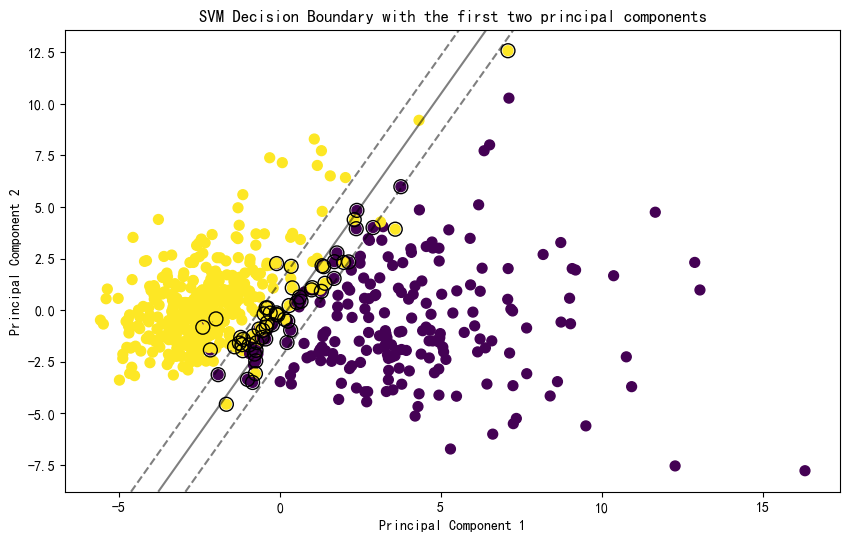

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# 加载数据集
data = load_breast_cancer()
X = data.data
y = data.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用PCA进行降维，以便于可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 创建SVM模型
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# 绘制决策边界
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)

# 创建网格以绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和边界上的支持向量
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with the first two principal components')
plt.show()
